# Supuestos en Regresión Lineal

In [19]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms

In [20]:
df = pd.read_csv(
    "D://Coderhouse//10. Estudios de Casos de Modelos Analíticos//statex77.csv"
)
df.head()

,Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area
0,3615,3624,2.1,69.05,15.1,41.3,20,50708
1,365,6315,1.5,69.31,11.3,66.7,152,566432
2,2212,4530,1.8,70.55,7.8,58.1,15,113417
3,2110,3378,1.9,70.66,10.1,39.9,65,51945
4,21198,5114,1.1,71.71,10.3,62.6,20,156361


Luego de crear nuestro dataframe a partir de las columnas seleccionadas, utilizamos la librería 'statsmdodels' para realizar el análisis de regresión lineal.

En el siguiente código agregamos una columna constante ('sm.add_constant(X)') de unos a la izquierda del dataframe. Esto se hace para que la regresión lineal pueda tener un término independiente (o intercepto) en el modelo. Esta columna constante es necesaria para algunos análisis estadísticos, como la regresión lineal, donde queremos ajustar una línea que no necesariamente pasa por el origen.

In [21]:
X = df.loc[
    :, ["Population", "Income", "Illiteracy", "Murder", "HS Grad", "Frost", "Area"]
]
X = sm.add_constant(X)
X.head()

,const,Population,Income,Illiteracy,Murder,HS Grad,Frost,Area
0,1.0,3615,3624,2.1,15.1,41.3,20,50708
1,1.0,365,6315,1.5,11.3,66.7,152,566432
2,1.0,2212,4530,1.8,7.8,58.1,15,113417
3,1.0,2110,3378,1.9,10.1,39.9,65,51945
4,1.0,21198,5114,1.1,10.3,62.6,20,156361


In [22]:
# Visualizamos los valores de nuestra varibale objetivo:
Y = df["Life Exp"]
Y.head()

0    69.05
1    69.31
2    70.55
3    70.66
4    71.71
Name: Life Exp, dtype: float64

Ahora, creamos un modelo de regresión lineal utilizando la librería 'statsmodels'. En este caso, utilizamos el método de mínimos cuadrados 'OSL' junto con las variables de respuesta 'Y' y, el dataframe 'X' (contiene las variables predictoras).

In [23]:
mod = sm.OLS(Y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Life Exp   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     16.74
Date:                Thu, 03 Aug 2023   Prob (F-statistic):           2.53e-10
Time:                        06:08:24   Log-Likelihood:                -51.855
No. Observations:                  50   AIC:                             119.7
Df Residuals:                      42   BIC:                             135.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.9432      1.748     40.586      0.0

Realizamos el mismo proceso descrito anteriormente y seleccionamos solo 4 variables predictoras. Agregamos una columna constante y procedemos a realizar la regresión lineal.

In [24]:
X_red = df.loc[:, ["Population", "Murder", "HS Grad", "Frost"]]
X_red = sm.add_constant(X_red)
X_red.head()

,const,Population,Murder,HS Grad,Frost
0,1.0,3615,15.1,41.3,20
1,1.0,365,11.3,66.7,152
2,1.0,2212,7.8,58.1,15
3,1.0,2110,10.1,39.9,65
4,1.0,21198,10.3,62.6,20


In [25]:
mod_red = sm.OLS(Y, X_red)
res_red = mod_red.fit()
print(res_red.summary())

                            OLS Regression Results                            
Dep. Variable:               Life Exp   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     31.37
Date:                Thu, 03 Aug 2023   Prob (F-statistic):           1.70e-12
Time:                        06:08:24   Log-Likelihood:                -51.866
No. Observations:                  50   AIC:                             113.7
Df Residuals:                      45   BIC:                             123.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.0271      0.953     74.542      0.0

Como conclusión podemos decir que, ambas regresiones obtuvieron un R-cuadrado similar, lo que indica que ambas capturan una cantidad similar de la variabilidad en la esperanza de vida. Sin embargo, el segundo modelo, que utiliza solo cuatro variables predictoras, parece ser más parsimonioso y, por lo tanto, podría ser preferible ya que utiliza menos variables para lograr una predicción similar. Es posible que las variables "Population", "Murder", "HS Grad" y "Frost" sean las que mejor expliquen la variabilidad en la esperanza de vida de los datos en cuestión.

## Verificación de supuestos

A continuación se verificará que el modelo cumpla los supuestos de la regresión lineal:

* Los errores tienen media cero.

* Los errores tienen la misma varianza \(σ^2\).

* Los errores son independientes entre sí.

* Los errores tienen una distribución Normal.

### Media cero
Para verificar este supuesto se realizará un diagrama de dispersión de los residuos frente a cada una de las variables independientes del modelo. Con estos diagramas se busca identificar si los residuos siguen algún tipo de comportamiento, por ejemplo, que todos los residuos tengan valores positivos o que aparentemente se distribuyan alrededor de una curva.

 > Los *residuos* son las diferencias entre los valores observados y los valores predichos por el modelo para cada punto de datos en el conjunto de datos. Matemáticamente, el residuo para un punto de datos específico se calcula restando el valor observado (la variable dependiente real) del valor predicho por el modelo para ese mismo punto.

 > El análisis de los residuos también nos ayuda a identificar problemas en el modelo, como heterocedasticidad (variabilidad de los residuos que cambia a lo largo del rango de valores), falta de linealidad, presencia de valores atípicos, etc.

In [26]:
# Utilizamos el atributo '.resid' para obtener los residuos del modelo:
residuos = res_red.resid
np.mean(residuos)

-2.745537130977027e-13

Como podemos observar el promedio de los residuos es relativamente cero, podemos asumir que el modelo está haciendo predicciones relativamente precisas.

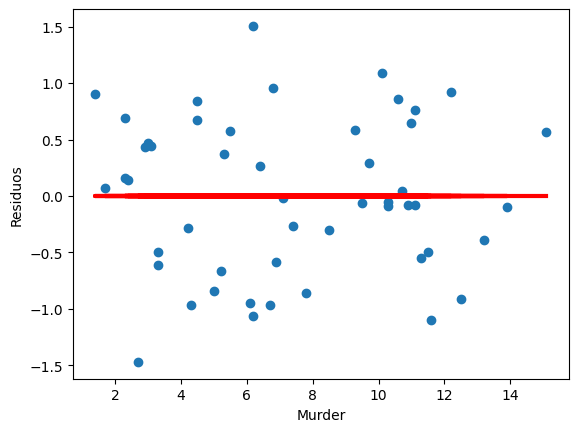

In [27]:
# Graicamos la distribución de los residuos:

import matplotlib.pyplot as plt

plt.scatter(df["Murder"], residuos)
plt.plot(df["Murder"], [0] * len(df), color="red", linewidth=3)
plt.xlabel("Murder")
plt.ylabel("Residuos")
plt.show()

### Varianza constante
Para verificar el supuesto de varianza constante o homoscedasticidad se utilizarán dos métodos. El primero de ellos consiste en construir un diagramas de dispersión de los residuos contra los valores proyectados $(\hat{y}_i)$ de la siguiente forma:

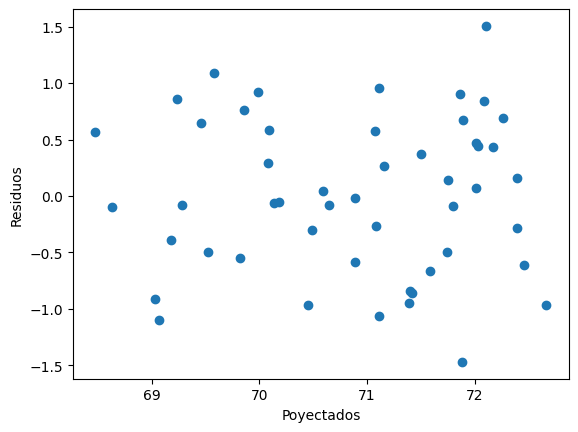

In [28]:
proyectado = res.fittedvalues
plt.scatter(proyectado, residuos)
plt.xlabel("Poyectados")
plt.ylabel("Residuos")
plt.show()

En este caso los residuos parecen distribuirse en una misma franja y por lo tanto no se encuentran indicios claros de heterocedasticidad *(En estadística se dice que un modelo de regresión lineal presenta heterocedasticidad cuando la varianza de los errores no es constante en todas las observaciones realizadas)*. Sin embargo, este método es subjetivo por lo que se utilizará la prueba de Breusch Pagan para determinar si hay presencia de homocedasticidad. En la prueba de Breusch Pagan se tienen las siguientes hipótesis:

 $H_0$: Hay homocedasticidad

$H_a$: Hay heterocedasticidad

In [29]:
# Breusch - Pagan:
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
# 'residuos' es el array de residuos y 'res.model.exog' es la matriz de variables independientes utilizadas en el modelo:
test = sms.het_breuschpagan(residuos, res.model.exog)
pd.DataFrame(list(test), index=name, columns=["Breusch-Pagan"])

,Breusch-Pagan
Lagrange multiplier statistic,8.763756
p-value,0.270065
f-value,1.275153
f p-value,0.285845


1. Lagrange multiplier statistic: 8.763756
- Esta estadística es una medida del grado de heterocedasticidad. Valores más grandes indican una mayor evidencia de heterocedasticidad.

2. p-value: 0.270065

- Es la probabilidad asociada con la prueba estadística. En este caso, el p-value corresponde a la probabilidad de observar el valor de la estadística del multiplicador de Lagrange si la heterocedasticidad no está presente en los residuos.
Si el valor p es pequeño (generalmente menor que 0.05), se considera evidencia en contra de la hipótesis nula de homocedasticidad (varianza constante) y sugiere que la heterocedasticidad podría estar presente.
En este caso, el valor p es mayor que 0.05, lo que sugiere que no hay suficiente evidencia para rechazar la hipótesis nula de homocedasticidad. Sin embargo, esto no garantiza que la homocedasticidad esté presente, solo indica que no hay suficiente evidencia para decir lo contrario.

3. f-value: 1.275153

- Esta es otra estadística que se utiliza en el test de Breusch-Pagan para evaluar la heterocedasticidad. Al igual que el estadístico del multiplicador de Lagrange, valores más grandes indican más evidencia de heterocedasticidad.

4. f p-value (valor p del estadístico F): 0.285845

- Similar al p-value anterior, este valor p está asociado al estadístico F. Al igual que con el valor p anterior, un valor mayor que 0.05 indica que no hay suficiente evidencia para rechazar la hipótesis nula de homocedasticidad.
En resumen, en función de los resultados proporcionados:

**Conclusión:**
- No hay suficiente evidencia para afirmar que los residuos presentan heterocedasticidad.
- Los p-values para ambas pruebas (p-value y p-value del estadístico F) son mayores que 0.05, lo que sugiere que la varianza constante (homocedasticidad) podría estar presente en los residuos. Sin embargo, esto no garantiza que no haya heterocedasticidad; simplemente indica que no hay suficiente evidencia en contra de la hipótesis de homocedasticidad.

In [30]:
# Goldfeld-Quandt:
name = ["F statistic", "p-value", "type"]
test = sms.het_goldfeldquandt(residuos, res.model.exog)
pd.DataFrame(list(test), index=name, columns=["Goldfeld-Quant"])

,Goldfeld-Quant
F statistic,0.632208
p-value,0.823175
type,increasing


### Normalidad
Para verificar el supuesto de normalidad es posible utilizar los [gráficos cuartil-cuartil o Q-Q plot](https://es.wikipedia.org/wiki/Gr%C3%A1fico_Q-Q) e histogramas:

La prueba de normalidad es una herramienta en estadísticas que se usa para verificar si los datos que tenemos se asemejan a una distribución normal, también conocida como la "curva de campana". La distribución normal es muy común y tiene propiedades matemáticas que facilitan el análisis estadístico.

Cuando realizamos un análisis estadístico, a menudo asumimos que nuestros datos siguen una distribución normal. Sin embargo, en la vida real, los datos pueden variar y no siempre encajarán perfectamente en una distribución normal. La prueba de normalidad ayuda a verificar si esta suposición es razonable o si nuestros datos son significativamente diferentes de una distribución normal.

La prueba de normalidad compara los datos que tenemos con lo que esperaríamos ver en una distribución normal. Si los datos son muy diferentes de lo que se espera en una distribución normal, la prueba puede indicar que los datos no son normalmente distribuidos.

Los residuos son las diferencias entre los valores observados y los valores predichos por el modelo de regresión. Si los residuos se distribuyen de manera aproximadamente normal, eso indica que el modelo se ajusta bien a los datos y que las estimaciones de los coeficientes son más confiables.

In [31]:
from scipy import stats

Text(0.5, 1.0, 'Q-Q plot')

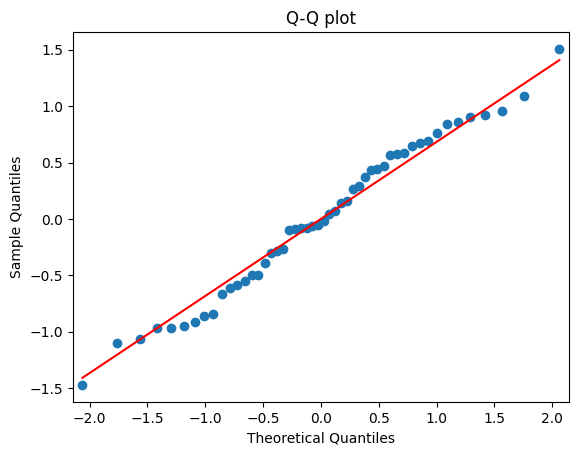

In [32]:
# El siguiente código compara los cuantiles de los residuos con los cuantiles esperados de una distribución normal:
sm.ProbPlot(res_red.resid).qqplot(line="s")
plt.title("Q-Q plot")

$H_0$: Los residuos siguen una distribución Normal

$H_a$: Los residuos no siguen una distribución Normal

In [33]:
jb = stats.jarque_bera(
    res_red.resid
)  #  Realiza el test de Jarque-Bera para evaluar si los residuos siguen una distribución normal.
sw = stats.shapiro(
    res_red.resid
)  #  Realiza el test de Shapiro-Wilk para verificar la normalidad de los residuos.
ad = stats.anderson(
    res_red.resid, dist="norm"
)  # Realiza el test de Anderson-Darling para la normalidad de los residuos.
ks = stats.kstest(
    res_red.resid, "norm"
)  # Realiza el test de Kolmogorov-Smirnov para evaluar si los residuos siguen una distribución normal.

print(f"Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}")
print(f"Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}")
print(
    f"Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}"
)
print(
    f"Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}"
)

Jarque-Bera test ---- statistic: 1.4262, p-value: 0.4901138054404208
Shapiro-Wilk test ---- statistic: 0.9794, p-value: 0.5250
Kolmogorov-Smirnov test ---- statistic: 0.1294, p-value: 0.3424
Anderson-Darling test ---- statistic: 0.3602, 5% critical value: 0.7360


Utilizando una significancia del 5% no se rechaza la hipótesis nula, por lo que se puede decir que el modelo cumple el supuesto de normalidad.

### Independencia
Para verificar el supuesto de independencia se utilizará la [prueba de Durbin-Watson](https://es.wikipedia.org/wiki/Estad%C3%ADstico_de_Durbin-Watson). Con esto se busca determinar si los errores se encuentran correlacionados entre sí o autocorrelacionados. Esta prueba utiliza las siguientes hipótesis:

$H_0$: No hay presencia de autocorrelación

$H_a$: Hay presencia de autocorrelación

In [34]:
from statsmodels.stats.stattools import durbin_watson

durbinWatson = durbin_watson(residuos)
print("Valores de 1.5 < d < 2.5 normalmente muestran que no hay autocorrelacion")
print("0 a 2 < hay autocorrelacion positiva")
print("> 2 a 4 hay autocorrelacion negativa")
print("-------------------------------------")
print("Durbin-Watson:", durbinWatson)

Valores de 1.5 < d < 2.5 normalmente muestran que no hay autocorrelacion
0 a 2 < hay autocorrelacion positiva
> 2 a 4 hay autocorrelacion negativa
-------------------------------------
Durbin-Watson: 1.913997407729607


C:\Users\Andres\AppData\Local\Temp\ipykernel_17644\1635941238.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


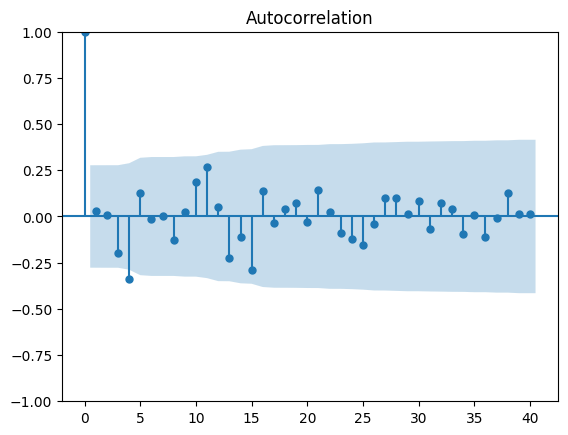

In [35]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(res_red.resid, lags=40, alpha=0.05)
acf.show()

### No multicolinealidad
Por último se realizará una prueba adicional para verificar que no exista presencia de multicolinealidad. Para esto se calcula el factor de inflación de la varianza (VIF) para cada una de las variables independientes del modelo, con el que se dirá que existe alta multicolinealidad cuando el VIF es mayor a 10.

In [36]:
# Importamos la función variance_inflation_factor del módulo statsmodels.stats.outliers_influence
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculamos el VIF para cada variable en X_red (matriz de variables predictoras reducidas)
# VIF mide la multicolinealidad entre variables, cuánto se "infla" la varianza de un coeficiente debido a la correlación con otras variables
vif = [variance_inflation_factor(X_red.values, i) for i in range(X_red.shape[1])]

# Creamos un DataFrame con los resultados de VIF para cada variable
# Usamos las columnas seleccionadas ("Population", "Murder", "HS Grad", "Frost") como índices
# Excluimos el primer valor de VIF (que corresponde al intercepto constante)
pd.DataFrame(
    {"vif": vif[1:]},
    index=df.loc[:, ["Population", "Murder", "HS Grad", "Frost"]].columns,
).T

,Population,Murder,HS Grad,Frost
vif,1.189835,1.727844,1.356791,1.498077


Luego de analizar los resultados del factor de inflación de la varianza, los resultados sugieren que no hay multicolinealidad.

### Ejercicio Propuesto Práctica

**Utilice el conjunto de datos Ejercicio_Supuestos en la carpeta**

La revista Biometry publicó en el año de 1981 los siguientes datos que relacionan la contaminación del aire observada en 41 ciudades de los Estados Unidos con un conjunto de seis variables explicativas definidas en los términos siguientes:

y: concentración promedio anual de dióxido de azufre (microgramos por metro cúbico)
x1: temperatura promedio anual (ºF)
x2: número de fábricas que emplean 20 o más trabajadores

x3: número de habitantes (en miles) según el censo de 1970
x4: velocidad promedio anual del viento (millas por hora)
x5: precipitación promedio anual (pulgadas)
x6: número promedio de días con lluvias al año

Se desea construir un modelo que permita caracterizar la relación entre la contaminación del aire y las seis variables explicativas, como también predecir el nivel de contaminación que se obtendría para ciertos valores de las variables explicativas previamente definidos.

1.	Grafique la variable y vs. cada una de las variables explicativas. A partir de los gráficos, determine si se requieren términos de orden superior para representar en el modelo alguna de las variables explicativas.
2.	¿Existe alguna evidencia de multicolinealidad entre las variables explicativas del modelo? Utilice en su diagnóstico:
    a.	Diagramas de dispersión
    b.	Matriz de correlaciones
3.	Calcule el factor de inflación de varianza para cada una de las variables explicativas de un modelo lineal que relaciona y con las variables x1 a x6. A partir de estos factores, ¿considera usted que hay un problema de multicolinealidad entre las variables explicativas? 
4.	¿Cuáles variables explican en mayor grado la contaminación del aire?
5.	Realice una reducción de variables, luego con el modelo reducido responda:
    a.	¿ los residuos siguen una distribución normal? Justifique su respuesta.
    b.	¿ se satisface el supuesto de varianza constante? Justifique su respuesta.
6.	Estime la concentración promedio anual de dióxido de azufre en el aire en una ciudad que reporta los siguientes valores para las seis variables explicativas: x1 = 60, x2 = 150, x3 = 600, x4 = 10, x5 = 40, x6 = 100